# Agregando datos

Vamos a crear nuestro propio dataset

In [1]:
import numpy as np
import pandas as pd

In [2]:
gender = ["Male","Female"]
income = ["Poor", "Middle Class","Rich"]

n = 500

gender_data = []
income_data = []

for i in range(0,n):
    gender_data.append(np.random.choice(gender))
    income_data.append(np.random.choice(income))

In [3]:
age = 30+12*np.random.randn(n)
weight = 65+25*np.random.randn(n)
height = 160+25*np.random.randn(n)
income = 18000+3500*np.random.randn(n)

data = pd.DataFrame(
    {
        "Gender":gender_data,
        "Economics Status": income_data,
        "height":height,
        "weight":weight,
        "age":age,
        "income":income          
    }
)

In [4]:
data.head()

,Gender,Economics Status,height,weight,age,income
0,Female,Middle Class,136.697355,67.726272,29.520201,18970.984352
1,Female,Poor,98.665914,47.966866,27.897815,18124.731181
2,Male,Rich,180.465436,123.160425,27.645396,15237.892859
3,Female,Middle Class,160.090802,49.229570,55.812848,14000.636573
4,Male,Poor,155.333190,66.275940,15.445707,20470.874500


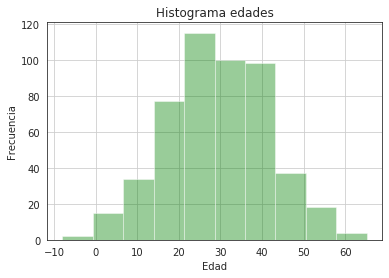

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")

plt.hist(data["age"], facecolor = "green", alpha = 0.4)
plt.title("Histograma edades")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.grid()
plt.show()

# Agrupación de datos

In [6]:
grouped_gender = data.groupby("Gender")

In [7]:
grouped_gender.groups

{'Female': Int64Index([  0,   1,   3,   7,  10,  13,  15,  16,  17,  18,
             ...
             489, 490, 491, 492, 493, 494, 495, 496, 497, 498],
            dtype='int64', length=256),
 'Male': Int64Index([  2,   4,   5,   6,   8,   9,  11,  12,  14,  19,
             ...
             475, 476, 477, 479, 480, 481, 482, 486, 487, 499],
            dtype='int64', length=244)}

In [8]:
# para conseguir solo a las mujeres
mujeres = grouped_gender.get_group("Female")
mujeres.head()

,Gender,Economics Status,height,weight,age,income
0,Female,Middle Class,136.697355,67.726272,29.520201,18970.984352
1,Female,Poor,98.665914,47.966866,27.897815,18124.731181
3,Female,Middle Class,160.090802,49.229570,55.812848,14000.636573
7,Female,Rich,149.229730,32.006052,13.617400,16552.429362
10,Female,Rich,142.016276,58.230273,25.626537,19976.742904


Podemos hacer una agrupación por mas de una categoria

In [9]:
double_group  = data.groupby(["Gender","Economics Status"])

In [10]:
for names,groups in double_group:
    print(names,groups)

('Female', 'Middle Class')      Gender Economics Status      height     weight        age        income
0    Female     Middle Class  136.697355  67.726272  29.520201  18970.984352
3    Female     Middle Class  160.090802  49.229570  55.812848  14000.636573
17   Female     Middle Class  120.883057  66.912944  39.411845  17119.768199
21   Female     Middle Class  181.709604  65.600132  23.212672  20681.680924
38   Female     Middle Class  159.298895  50.576682  32.434992  19163.437760
..      ...              ...         ...        ...        ...           ...
488  Female     Middle Class  186.146163  58.255405  32.253241  16411.690457
489  Female     Middle Class  145.758858  19.992805  36.702731  20885.323691
491  Female     Middle Class  126.373614  27.284534  44.382071  15501.726106
492  Female     Middle Class  143.161526  37.600987  28.376056  18145.039192
496  Female     Middle Class  186.344755  75.518113   2.709689  18437.868250

[84 rows x 6 columns]
('Female', 'Poor')      Ge

# Operaciones sobre datos agrupados

In [11]:
double_group.sum()

height       weight          age        income
Gender Economics Status                                                      
Female Middle Class      13452.046398  5220.645832  2365.726954  1.521909e+06
       Poor              12494.174803  4654.117396  2128.525947  1.401353e+06
       Rich              14980.323876  6672.539992  2865.469470  1.729220e+06
Male   Middle Class      12918.719865  5515.369448  2554.301049  1.448070e+06
       Poor              12607.298622  5167.958356  2546.604646  1.489161e+06
       Rich              13033.145252  5428.993387  2267.370139  1.379858e+06

In [12]:
double_group.mean()

height     weight        age        income
Gender Economics Status                                                
Female Middle Class      160.143409  62.150546  28.163416  18117.969283
       Poor              162.262010  60.443083  27.643194  18199.390998
       Rich              157.687620  70.237263  30.162837  18202.312219
Male   Middle Class      159.490369  68.090981  31.534581  17877.406407
       Poor              151.895164  62.264559  30.681984  17941.700319
       Rich              162.914316  67.862417  28.342127  17248.223282

In [13]:
double_group.size() # n° de elementos por categoria

Gender  Economics Status
Female  Middle Class        84
        Poor                77
        Rich                95
Male    Middle Class        81
        Poor                83
        Rich                80
dtype: int64

In [14]:
double_group.describe()

height                                                 \
                         count        mean        std         min         25%   
Gender Economics Status                                                         
Female Middle Class       84.0  160.143409  26.286006   96.854845  140.774199   
       Poor               77.0  162.262010  24.070857   98.665914  144.033570   
       Rich               95.0  157.687620  25.549854  101.443610  140.415344   
Male   Middle Class       81.0  159.490369  25.250270   84.877562  142.246419   
       Poor               83.0  151.895164  24.130341   85.237985  138.865258   
       Rich               80.0  162.914316  24.411331   97.263479  147.631021   

                                                            weight             \
                                50%         75%         max  count       mean   
Gender Economics Status                                                         
Female Middle Class      158.001211  179.768802  227.623862   84.0  62.150546   
       Poor              164.278562  178.107550  211.002514   77.0  60.443083   
       Rich              157.898798  173.218939  213.516476   95.0  70.237263   
Male   Middle Class      161.250763  176.515847  214.706902   81.0  68.090981   
       Poor              152.300156  169.664545  201.924246   83.0  62.264559   
       Rich              165.064044  182.252320  208.110064   80.0  67.862417   

                         ...        age            income                \
                         ...        75%        max  count          mean   
Gender Economics Status  ...                                              
Female Middle Class      ...  36.582209  65.181337   84.0  18117.969283   
       Poor              ...  35.806169  51.450134   77.0  18199.390998   
       Rich              ...  39.995235  58.120032   95.0  18202.312219   
Male   Middle Class      ...  39.826380  61.011284   81.0  17877.406407   
       Poor              ...  39.211283  58.870718   83.0  17941.700319   
       Rich              ...  37.173376  56.753053   80.0  17248.223282   

                                                                  \
                                 std           min           25%   
Gender Economics Status                                            
Female Middle Class      3197.906249  11198.006058  15538.053060   
       Poor              3453.841122   9884.015363  15624.091958   
       Rich              4082.357134   3226.994652  16483.881116   
Male   Middle Class      3580.202561  10457.874642  15561.193493   
       Poor              3443.645818  10516.402419  15378.103123   
       Rich              3307.989284   6233.687774  15400.893258   

                                                                   
                                  50%           75%           max  
Gender Economics Status                                            
Female Middle Class      18151.142732  19932.052118  25619.950108  
       Poor              18281.977484  20330.028727  27021.502039  
       Rich              18384.525139  20486.086738  28352.806725  
Male   Middle Class      17362.820625  20536.761196  26074.860846  
       Poor              17554.550049  20521.979134  25897.041871  
       Rich              17203.171478  20057.459480  23450.303416  

[6 rows x 32 columns]

In [15]:
# Los objetos groupby se comportan como cualquier DataFrame, en ese sentido se puede seleccionar cualquier columna
grouped_income = double_group["income"]
grouped_income.describe()

count          mean          std           min  \
Gender Economics Status                                                   
Female Middle Class       84.0  18117.969283  3197.906249  11198.006058   
       Poor               77.0  18199.390998  3453.841122   9884.015363   
       Rich               95.0  18202.312219  4082.357134   3226.994652   
Male   Middle Class       81.0  17877.406407  3580.202561  10457.874642   
       Poor               83.0  17941.700319  3443.645818  10516.402419   
       Rich               80.0  17248.223282  3307.989284   6233.687774   

                                  25%           50%           75%  \
Gender Economics Status                                             
Female Middle Class      15538.053060  18151.142732  19932.052118   
       Poor              15624.091958  18281.977484  20330.028727   
       Rich              16483.881116  18384.525139  20486.086738   
Male   Middle Class      15561.193493  17362.820625  20536.761196   
       Poor              15378.103123  17554.550049  20521.979134   
       Rich              15400.893258  17203.171478  20057.459480   

                                  max  
Gender Economics Status                
Female Middle Class      25619.950108  
       Poor              27021.502039  
       Rich              28352.806725  
Male   Middle Class      26074.860846  
       Poor              25897.041871  
       Rich              23450.303416

In [16]:
double_group.aggregate(
    {
        "income": np.sum,
        "height": np.mean,
        "weight": np.std
        
        
    }


)

income      height     weight
Gender Economics Status                                     
Female Middle Class      1.521909e+06  160.143409  22.526754
       Poor              1.401353e+06  162.262010  22.892161
       Rich              1.729220e+06  157.687620  24.497712
Male   Middle Class      1.448070e+06  159.490369  27.838063
       Poor              1.489161e+06  151.895164  25.093080
       Rich              1.379858e+06  162.914316  22.677678

In [17]:
double_group.aggregate(
    {
        "age" : np.mean,
        "height" : lambda h : (np.mean(h))/np.std(h) # Tipificación
        
        
    }

)

age    height
Gender Economics Status                     
Female Middle Class      28.163416  6.128936
       Poor              27.643194  6.785219
       Rich              30.162837  6.204504
Male   Middle Class      31.534581  6.355737
       Poor              30.681984  6.333046
       Rich              28.342127  6.715823

In [18]:
##para agregar a todas las columnas:

double_group.aggregate([np.sum,np.mean,np.std])

height                              weight  \
                                  sum        mean        std          sum   
Gender Economics Status                                                     
Female Middle Class      13452.046398  160.143409  26.286006  5220.645832   
       Poor              12494.174803  162.262010  24.070857  4654.117396   
       Rich              14980.323876  157.687620  25.549854  6672.539992   
Male   Middle Class      12918.719865  159.490369  25.250270  5515.369448   
       Poor              12607.298622  151.895164  24.130341  5167.958356   
       Rich              13033.145252  162.914316  24.411331  5428.993387   

                                                       age             \
                              mean        std          sum       mean   
Gender Economics Status                                                 
Female Middle Class      62.150546  22.526754  2365.726954  28.163416   
       Poor              60.443083  22.892161  2128.525947  27.643194   
       Rich              70.237263  24.497712  2865.469470  30.162837   
Male   Middle Class      68.090981  27.838063  2554.301049  31.534581   
       Poor              62.264559  25.093080  2546.604646  30.681984   
       Rich              67.862417  22.677678  2267.370139  28.342127   

                                          income                             
                               std           sum          mean          std  
Gender Economics Status                                                      
Female Middle Class      12.641374  1.521909e+06  18117.969283  3197.906249  
       Poor              10.398367  1.401353e+06  18199.390998  3453.841122  
       Rich              13.069469  1.729220e+06  18202.312219  4082.357134  
Male   Middle Class      11.651334  1.448070e+06  17877.406407  3580.202561  
       Poor              12.885470  1.489161e+06  17941.700319  3443.645818  
       Rich              12.239967  1.379858e+06  17248.223282  3307.989284

In [19]:
## Si queremos agregar con una lambda

double_group.aggregate([lambda x:np.mean(x)/np.std(x)])

height    weight       age    income
                         <lambda>  <lambda>  <lambda>  <lambda>
Gender Economics Status                                        
Female Middle Class      6.128936  2.775536  2.241257  5.699600
       Poor              6.785219  2.657654  2.675849  5.303872
       Rich              6.204504  2.882305  2.320129  4.482429
Male   Middle Class      6.355737  2.461207  2.723384  5.024518
       Poor              6.333046  2.496428  2.395605  5.241761
       Rich              6.715823  3.011357  2.330149  5.247008

## Filtrado de datos

In [20]:
double_group['age'].filter(lambda x: x.sum() > 2500)

4      15.445707
6      29.956800
7      13.617400
8      28.254747
10     25.626537
         ...    
479    52.658399
480    27.915847
487    39.799520
490    28.704120
495    41.287219
Name: age, Length: 259, dtype: float64

## Transformación de variables

In [21]:
zscore = lambda x : (x-x.mean())/x.std()

In [22]:
z_group = double_group.transform(zscore)

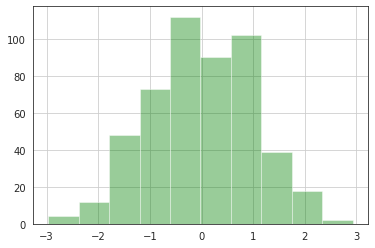

In [28]:
import matplotlib.pyplot as plt

plt.hist(z_group["age"], facecolor = "green", alpha = 0.4)
plt.grid()
plt.show()

Si queremos cambiar los NaN por algún valor dado, podemos hacerlo de la siguiente forma:

In [29]:
fill_na_mean = lambda x: x.fillna(x.mean)

In [30]:
double_group.transform(fill_na_mean)

,height,weight,age,income
0,136.697355,67.726272,29.520201,18970.984352
1,98.665914,47.966866,27.897815,18124.731181
2,180.465436,123.160425,27.645396,15237.892859
3,160.090802,49.229570,55.812848,14000.636573
4,155.333190,66.275940,15.445707,20470.874500
...,...,...,...,...
495,131.982705,63.851249,41.287219,18018.540389
496,186.344755,75.518113,2.709689,18437.868250
497,179.024978,61.629786,28.341315,13147.406183
498,182.014656,48.384348,14.525270,14245.723605


En este caso no teniamos NaN, pero de todas formas son lineas de mucha utilidad para este tipo de tareas.

## operaciones diversas muy utiles

In [40]:
double_group.head(1)

,Gender,Economics Status,height,weight,age,income
0,Female,Middle Class,136.697355,67.726272,29.520201,18970.984352
1,Female,Poor,98.665914,47.966866,27.897815,18124.731181
2,Male,Rich,180.465436,123.160425,27.645396,15237.892859
4,Male,Poor,155.333190,66.275940,15.445707,20470.874500
6,Male,Middle Class,139.368000,48.937959,29.956800,17193.451767
7,Female,Rich,149.229730,32.006052,13.617400,16552.429362


In [43]:
double_group.nth(32)

height      weight        age        income
Gender Economics Status                                                 
Female Middle Class      167.809688   78.063702  32.071741  16706.595345
       Poor              136.134021   92.432345  14.753207  18877.260021
       Rich              154.727617  106.175086  37.785284  17011.628283
Male   Middle Class      167.134168   50.419325  33.845008  10457.874642
       Poor              185.943078   52.866801  19.093399  20705.511775
       Rich              208.110064   57.420449  18.022320  14874.028074

Antes de agrupar el dataframe podemos ordenar las columnas, de modo que cuando agrupemos las variables tomer cierto orden

In [54]:
data_sorted  = data.sort_values(["income", "age"]) # El orden es prioritario para el primer argumento (income)

In [55]:
data_sorted.head()

,Gender,Economics Status,height,weight,age,income
145,Female,Rich,146.114083,77.588733,30.237675,3226.994652
386,Male,Rich,187.818427,62.481221,37.337674,6233.687774
18,Female,Rich,139.948598,38.659940,23.443375,9184.406813
428,Female,Rich,142.250674,99.249111,22.066597,9288.064259
186,Female,Poor,178.107550,51.792035,4.905168,9884.015363


In [56]:
data_sorted.tail()

,Gender,Economics Status,height,weight,age,income
30,Male,Middle Class,142.916138,46.884423,3.420878,26074.860846
404,Female,Rich,203.447026,66.276288,29.654649,26894.701315
264,Female,Poor,140.639159,109.218906,28.742692,26917.721177
301,Female,Poor,117.886853,31.822676,36.346528,27021.502039
451,Female,Rich,150.645877,76.930330,40.254334,28352.806725


In [57]:
income_grouped = data_sorted.groupby("Gender")

In [62]:
income_grouped.head()

,Gender,Economics Status,height,weight,age,income
145,Female,Rich,146.114083,77.588733,30.237675,3226.994652
386,Male,Rich,187.818427,62.481221,37.337674,6233.687774
18,Female,Rich,139.948598,38.659940,23.443375,9184.406813
428,Female,Rich,142.250674,99.249111,22.066597,9288.064259
186,Female,Poor,178.107550,51.792035,4.905168,9884.015363
395,Male,Rich,168.727043,110.908239,26.134664,10339.589941
194,Male,Middle Class,167.134168,50.419325,33.845008,10457.874642
136,Male,Poor,192.037912,104.224837,32.146108,10516.402419
314,Female,Rich,137.467069,56.152145,28.720673,10918.035783
232,Male,Middle Class,142.246419,139.657104,35.039080,11315.492320


## Conjunto de entrenamiento y conjunto de testing

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [90]:
data = pd.read_csv("/home/israel/Documentos/Machine-learning/python-ml-course/datasets/customer-churn-model/customer churn model.txt")

In [91]:
data.shape

(3333, 21)

### Dividir utilizando la districución normal

Vamos a crear un vector de la misma longitud del dataset y con una distribución normal

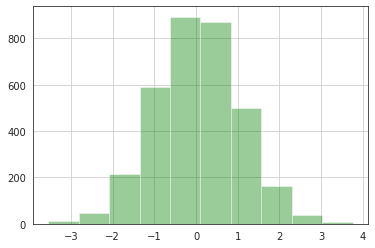

In [108]:
a = np.random.randn(len(data))
plt.hist(a, facecolor = "green", alpha = 0.4)
plt.grid()
plt.show()

si queremos hacer una división, podriamos por ejemplo, tomar los elementos menores que 0.8

In [109]:
check = a<0.8
check

array([ True,  True,  True, ...,  True, False,  True])

In [110]:
T= check.sum()

2594

In [111]:
F = len(check)-2594

739

Solo para ver las proporciones en un histograma: (el histograma no aguanta argumentos booleanos)

In [117]:
cuenta_true = 0
cuenta_false = 0

check_final = []

for i in check:
    if i == True:
        check_final.append(1)
        cuenta_true += 1
    else:
        check_final.append(0)
        cuenta_false += 1
        
print("True: ",cuenta_true,"False: ", cuenta_false)

True:  2594 False:  739


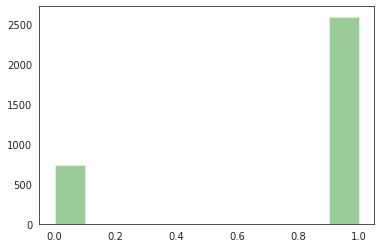

In [121]:
plt.hist(check_final, color = "g", alpha = 0.4)
plt.show()

luego, dividimos los datos

In [122]:
training = data[check]
testing = data[~check]

In [123]:
len(training)

2594

In [124]:
len(testing)

739

### train y test mediante sklearn

Esto es lo que haremos frecuentemente

In [125]:
from sklearn.model_selection import train_test_split

In [126]:
train, test = train_test_split(data,test_size = 0.2)

In [127]:
len(train)

2666

In [128]:
len(test)

667